In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
df = df.dropna()
df = df.reset_index()
df = df.drop(['index'], axis = 1)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


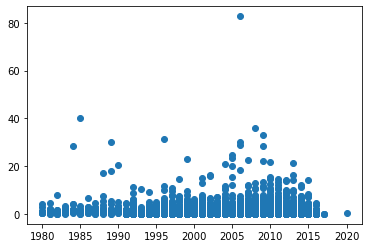

In [7]:
plt.scatter(df.Year , df.Global_Sales)

In [8]:
df2 = df.drop(['Rank','Name','Platform','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1)
df2

,Year,Global_Sales
0,2006.0,82.74
1,1985.0,40.24
2,2008.0,35.82
3,2009.0,33.00
4,1996.0,31.37
...,...,...
16286,2002.0,0.01
16287,2003.0,0.01
16288,2008.0,0.01
16289,2010.0,0.01


In [9]:
from sklearn.cluster import KMeans

In [10]:
k = KMeans(n_clusters = 3)

In [11]:
y = k.fit_predict(df2)

In [12]:
y

array([0, 2, 1, ..., 1, 1, 0])

In [13]:
df2['cluster'] = y

In [14]:
df2

,Year,Global_Sales,cluster
0,2006.0,82.74,0
1,1985.0,40.24,2
2,2008.0,35.82,1
3,2009.0,33.00,1
4,1996.0,31.37,2
...,...,...,...
16286,2002.0,0.01,0
16287,2003.0,0.01,0
16288,2008.0,0.01,1
16289,2010.0,0.01,1


In [15]:
sf0 = df2[df2.cluster == 0]
sf1 = df2[df2.cluster == 1]
sf2 = df2[df2.cluster == 2]

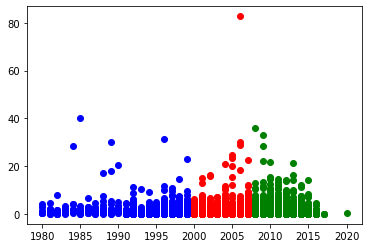

In [16]:
plt.scatter(sf0.Year, sf0.Global_Sales, color = 'red')
plt.scatter(sf1.Year, sf1.Global_Sales, color = 'green')
plt.scatter(sf2.Year, sf2.Global_Sales, color = 'blue' )
#plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], color ='black', marker = '*', label = 'centroid', s =300)
plt.show()

In [17]:
sse = []
kr = range(1,10)
for k in kr:
    km = KMeans(n_clusters= k)
    km.fit(df2)
    sse.append(km.inertia_)


In [18]:
sse

[601291.431034767,
 253683.42560755674,
 154413.99663307433,
 115492.35312623958,
 84889.75705669959,
 67734.04829984675,
 51598.504524321506,
 44637.40945611384,
 38949.16731485374]

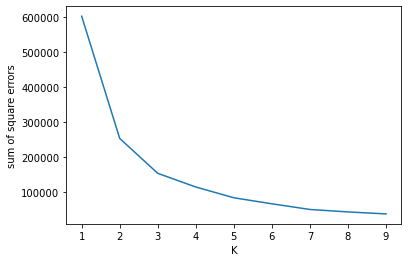

In [19]:
plt.xlabel('K')
plt.ylabel('sum of square errors')
plt.plot(kr, sse)
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
s = MinMaxScaler()

In [23]:
s.fit(df2[['Global_Sales']])

MinMaxScaler()

In [24]:
df2['Global_Sales'] = s.transform(df2[['Global_Sales']])

In [25]:
s.fit(df2[['Year']])

MinMaxScaler()

In [26]:
df2['Year'] = s.transform(df2[['Year']])

In [27]:
df2

,Year,Global_Sales,cluster
0,0.650,1.000000,0
1,0.125,0.486281,2
2,0.700,0.432854,1
3,0.725,0.398767,1
4,0.400,0.379064,2
...,...,...,...
16286,0.550,0.000000,0
16287,0.575,0.000000,0
16288,0.700,0.000000,1
16289,0.750,0.000000,1


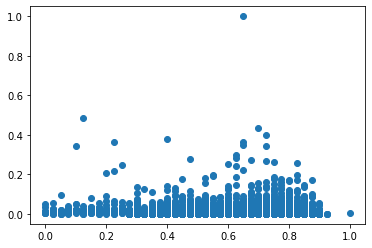

In [28]:
plt.scatter(df2.Year, df2.Global_Sales)

In [29]:
k = KMeans(n_clusters = 3)

In [30]:
y = k.fit_predict(df2)

In [31]:
y

array([1, 2, 0, ..., 0, 0, 1])

In [32]:
tf0 = df2[df2.cluster == 0]
tf1 = df2[df2.cluster == 1]
tf2 = df2[df2.cluster == 2]

In [33]:
sse = []
kr = range(1,10)
for k in kr:
    km = KMeans(n_clusters= k)
    km.fit(df2)
    sse.append(km.inertia_)


In [34]:
sse

[7488.651880589707,
 1903.8665230522874,
 77.44228876628138,
 55.63075848942623,
 37.39404368513834,
 23.37345238483088,
 19.201860880803995,
 15.962275679369993,
 13.406455835545216]

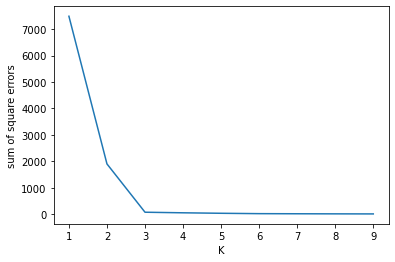

In [35]:
plt.xlabel('K')
plt.ylabel('sum of square errors')
plt.plot(kr, sse)
plt.show()